In [254]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style("whitegrid")
from math import exp, log

In [255]:
data = np.loadtxt("ex2data1.txt", delimiter=',')
x, y = data[:,:2], data[:,2]

print("x:\n", x[:5], "\n")
print("y:\n", y[:5])

x:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]] 

y:
 [0. 0. 0. 1. 1.]


In [256]:
# Creating plotData method to display the figure where the axes are the two exam scores.
def plotData(x, y, xlabel, ylabel, labelPos, labelNeg):
    pos = y == 1
    neg = y == 0
    
    # Scatter plotting the data, filtering them according the pos/neg values:
    plt.scatter(x[pos, 0], x[pos, 1], s=30, c='darkblue', marker='+', label=labelPos)
    plt.scatter(x[neg, 0], x[neg, 1], s=30, c='yellow', marker='o', edgecolors='b', label=labelNeg)

    # Labels and limits:
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(x[:, 0].min(), x[:, 0].max())
    plt.ylim(x[:, 1].min(), x[:, 1].max())

    # Legend:
    pst = plt.legend(loc='upper right', frameon=True)
    pst.get_frame().set_edgecolor('k');

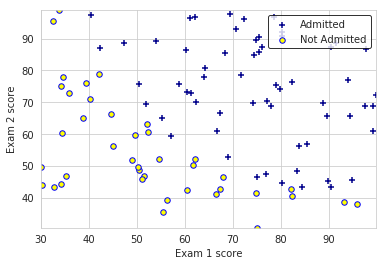

In [257]:
plotData(x, y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')

In [471]:
def sigmoid(z):
    if not (isinstance(z, int)) and (z.shape):
        rows = z.shape[0]
        
        g = [0] * rows
        for r in range(0, rows):
            columns = z[r].size
            if (columns > 1):
                g[r] = [0] * columns
                for c in range(0, columns):
                    g[r][c] = sigmoid(z[r][c])
            else:
                g[r] = sigmoid(z[r])
    else:
        g = 1 / (1 + exp(-z))
    return np.array(g)

from scipy.special import expit

In [469]:
def costFunction(theta, X, y):
    J = 0
    m = len(X)
    #grad = [0] * len(theta)
    sum = 0.0
    
    for r in range(0, m):
        h = 0.0
        for p in range(0, len(X[r])):
            h += theta[p] * X[r][p]
        h = sigmoid(h)
        if (h == 0):
            h = 0.1
        elif (h == 1):
            h = 0.9
        
        #for p in range(0, len(X[m])):
        #    grad[p] += (h - y[m]) * X[m][p]
        sum += -1.0 * y[r] * log(h) - (1.0 - y[r]) * log(1.0 - h)
    J = sum / m

    return J

In [400]:
def gradientFunc(theta, X, y):
    m = len(X)
    grad = [0] * len(theta)
    
    for m in range(0, m):
        h = 0
        for p in range(0, len(X[m])):
            h += theta[p] * X[m][p]
        h = sigmoid(h)
        for p in range(0, len(X[m])):
            grad[p] += (h - y[m]) * X[m][p]
    for p in range(0, len(X[m])):
        grad[p] = grad[p] / m 
    return np.array(grad)

In [467]:
X = np.ones((len(x), 3))
X[:, 1:3] = x

J = costFunction([0.0, 0.0, 0.0], X, y)
print("Cost: %0.3f"%(J))
grad = gradientFunc([0, 0, 0], X, y)
print("Gradient: {0}".format(grad))

Cost: 0.693
Gradient: [ -0.1010101  -12.13052181 -11.37660829]


In [472]:
# Importing minimize from scipy:
from scipy.optimize import minimize

# Finding the best parameters for θ, using the methods we created earlier:
# Expecting to see the cost around 0.203 per the assignment.
result = minimize(costFunction, [0, 0, 0], args=(X, y), method='BFGS', jac=gradientFunc, options={'maxiter' : 400, 'disp': True})
result

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 20
         Function evaluations: 28
         Gradient evaluations: 28


      fun: 0.20349770158948993
 hess_inv: array([[ 3.20166983e+03, -2.54925344e+01, -2.61414420e+01],
       [-2.54925344e+01,  2.16810801e-01,  1.95662363e-01],
       [-2.61414420e+01,  1.95662363e-01,  2.28530253e-01]])
      jac: array([3.37435484e-08, 3.35843623e-06, 9.40140688e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 20
     njev: 28
   status: 0
  success: True
        x: array([-25.16133599,   0.20623177,   0.20147159])

In [490]:
def hypothesis(X, theta):
    h = [0] * len(X)
    for i in range(0, len(X)):
        hTmp = 0.0
        for idx, t in enumerate(theta):
            hTmp += t * X[i][idx]
        h[i] = sigmoid(hTmp)
    return h

For a student with scores 45 and 85, we predict an admission probability of 0.776291


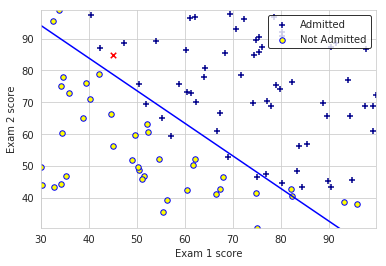

In [498]:
theta = result['x']

plotData(x, y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')
plot_x = np.array([np.min(X[:,2])-2,  max(X[:,2])+2]);
plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
plt.plot(plot_x, plot_y, c='b')

# Predict probability for a student with score 45 on exam 1  and score 85 on exam 2 
prob = hypothesis(np.array([[1, 45, 85]]), theta)
print("For a student with scores 45 and 85, we predict an admission probability of %f"%(prob[0]))

plt.scatter(45, 85, s=30, c='r', marker='x', label='Ex.1 - 45, Ex.2 - 85')

plt.show()

In [531]:
def checkAccuracy(y, h):
    a = 0
    for i in range(0, len(y)):
        if (h[i] > 0.5):
            c = 1.0
        else:
            c = 0.0
        if (y[i] == c):
            a = a + 1
    return a*100/len(y)

In [536]:
print('Train Accuracy: %0.f%%'%checkAccuracy(y, hypothesis(X, theta)));

Train Accuracy: 89%
